In [1]:
from itertools import product
import os

import matplotlib.pyplot as plt
import pandas as pd

from superfv import (
    OutputLoader,
    plot_1d_slice,
)

In [ ]:
base_path = "/scratch/gpfs/jp7427/out/hydro-advection-of-square-varying-min-density/"

# Loop parameters
rho_min_values = [1e-1, 1e-2, 1e-4, 1e-6, 1e-8]

common = dict(PAD={"rho": (0, None), "P": (0, None)}, SED=False)
apriori = dict(ZS=True, lazy_primitives="adaptive", **common)
aposteriori = dict(MOOD=True, lazy_primitives="full", MUSCL_limiter="PP2D", **common)

configs = {
    "p0": dict(p=0),
    "MUSCL-Hancock": dict(p=1, MUSCL=True, MUSCL_limiter="PP2D", **common),
    "ZS3": dict(p=3, GL=True, **apriori),
    "ZS7": dict(p=7, GL=True, **apriori),
    "ZS3t": dict(p=3, adaptive_dt=False, **apriori),
    "ZS7t": dict(p=7, adaptive_dt=False, **apriori),
    "MM3": dict(p=3, **aposteriori),
    "MM7": dict(p=7, **aposteriori),
    "MM3b": dict(p=3, blend=True, **aposteriori),
    "MM7b": dict(p=7, blend=True, **aposteriori),
    "MM3-2": dict(p=3, cascade="muscl1", max_MOOD_iters=2, **aposteriori),
    "MM7-2": dict(p=7, cascade="muscl1", max_MOOD_iters=2, **aposteriori),
    "MM3-3": dict(p=3, cascade="muscl1", max_MOOD_iters=3, **aposteriori),
    "MM7-3": dict(p=7, cascade="muscl1", max_MOOD_iters=3, **aposteriori),
}

# Load simulations
sims = {}
data = []
for (name, config), rho_min in product(configs.items(), rho_min_values):
    entry = dict(config=name, rho_min=rho_min, passed=None)

    sim_path = f"{base_path}/{name}/rho_min_{rho_min}/"

    if not os.path.exists(sim_path):
        raise FileNotFoundError(sim_path)

    if os.path.exists(sim_path + "error.txt"):
        entry["passed"] = False
    elif os.path.exists(sim_path + "timings.txt"):
        entry["passed"] = True
        sims[name + f"_{rho_min=}"] = OutputLoader(sim_path)
    else:
        raise FileNotFoundError("error.txt or timings.txt")
    data.append(entry)
df = pd.DataFrame(data)

Successfully read simulation output from "/scratch/gpfs/jp7427/out/hydro-advection-of-square-varying-min-density/p0/rho_min_0.1"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/hydro-advection-of-square-varying-min-density/p0/rho_min_0.01"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/hydro-advection-of-square-varying-min-density/p0/rho_min_0.0001"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/hydro-advection-of-square-varying-min-density/p0/rho_min_1e-06"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/hydro-advection-of-square-varying-min-density/p0/rho_min_1e-08"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/hydro-advection-of-square-varying-min-density/MUSCL-Hancock/rho_min_0.1"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/hydro-advection-of-square-varying-min-density/MUSCL-Hancock/rho_min_0.01"
Successfully read simulation output from "/scratch/gpfs/jp7427/out

In [3]:
df.pivot(index="rho_min", columns="config", values="passed").loc[
    :, configs.keys()
].sort_index(ascending=False)

config,p0,MUSCL-Hancock,ZS3,ZS7,ZS3t,ZS7t,MM3,MM7,MM3b,MM7b,MM3-2,MM7-2,MM3-3,MM7-3
rho_min,,,,,,,,,,,,,,
1.000000e-01,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1.000000e-02,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1.000000e-04,True,True,True,True,False,False,False,True,True,True,True,True,True,True
1.000000e-06,True,True,True,True,False,False,False,False,False,False,True,True,True,True
1.000000e-08,True,True,True,True,False,False,False,False,False,False,False,False,True,True


/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.492188
  warnings.warn(
/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.492188
  warnings.warn(
/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.492188
  warnings.warn(
/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.492188
  warnings.warn(
/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.492188
  warnings.warn(
/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.4921

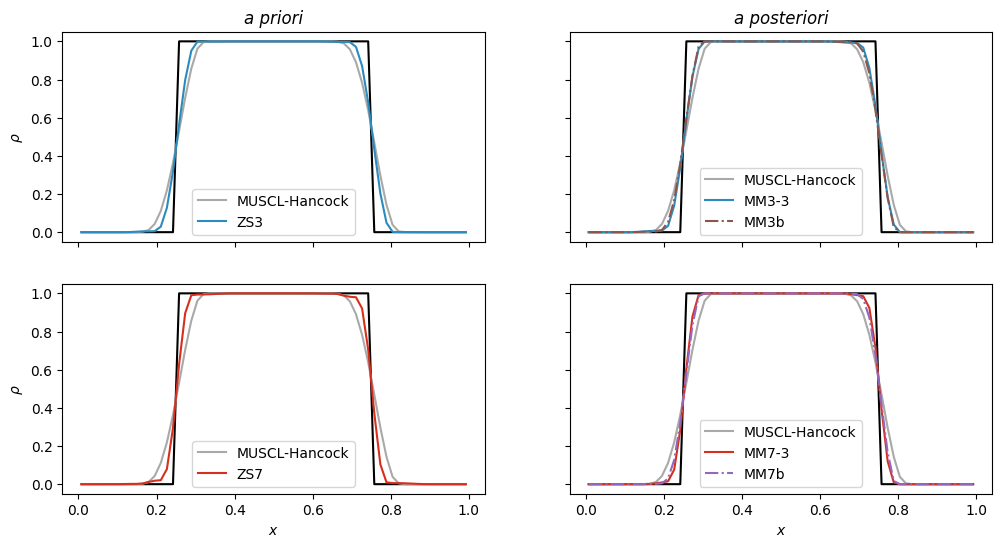

In [4]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12, 6))
axs[0, 0].set_title("a priori", style="italic")
axs[0, 1].set_title("a posteriori", style="italic")
axs[1, 0].set_xlabel(r"$x$")
axs[1, 1].set_xlabel(r"$x$")
axs[0, 0].set_ylabel(r"$\rho$")
axs[1, 0].set_ylabel(r"$\rho$")

rho_min = 1e-4

cmap1 = plt.get_cmap("GnBu")
cmap2 = plt.get_cmap("OrRd")

styles = {
    "MUSCL-Hancock": dict(color="darkgray"),
    "ZS3": dict(color=cmap1(0.75)),
    "ZS7": dict(color=cmap2(0.75)),
    "MM3": dict(color=cmap1(0.25)),
    "MM7": dict(color=cmap2(0.25)),
    "MM3-2": dict(color=cmap1(0.5)),
    "MM7-2": dict(color=cmap2(0.5)),
    "MM3-3": dict(color=cmap1(0.75)),
    "MM7-3": dict(color=cmap2(0.75)),
    "MM3b": dict(color="tab:brown", linestyle="-."),
    "MM7b": dict(color="tab:purple", linestyle="-."),
}

for i, j in [(0, 0), (0, 1), (1, 0), (1, 1)]:
    sim = sims["p0" + f"_{rho_min=}"]
    plot_1d_slice(sim, axs[i, j], "rho", cell_averaged=True, y=0.5, t=0, color="k")

for name in ["MUSCL-Hancock", "ZS3"]:
    sim = sims[name + f"_{rho_min=}"]
    plot_1d_slice(
        sim, axs[0, 0], "rho", cell_averaged=True, y=0.5, label=name, **styles[name]
    )

for name in ["MUSCL-Hancock", "MM3-3", "MM3b"]:
    sim = sims[name + f"_{rho_min=}"]
    plot_1d_slice(
        sim, axs[0, 1], "rho", cell_averaged=True, y=0.5, label=name, **styles[name]
    )

for name in ["MUSCL-Hancock", "ZS7"]:
    sim = sims[name + f"_{rho_min=}"]
    plot_1d_slice(
        sim, axs[1, 0], "rho", cell_averaged=True, y=0.5, label=name, **styles[name]
    )

for name in ["MUSCL-Hancock", "MM7-3", "MM7b"]:
    sim = sims[name + f"_{rho_min=}"]
    plot_1d_slice(
        sim, axs[1, 1], "rho", cell_averaged=True, y=0.5, label=name, **styles[name]
    )

for i, j in [(0, 0), (0, 1), (1, 0), (1, 1)]:
    axs[i, j].legend()

In [5]:
fig.savefig("squares.png", dpi=300)